# Load the data

In [1]:
import pandas as pd

completed_deals = pd.read_csv('../data/completed-or-current-deails-2019-10-29.csv')
lost_deals = pd.read_csv('../data/lost-deals-2019-10-28-1.csv')




#completed_deals = pd.read_csv('../data/closed-deals-with-mined-companies-data.csv', index_col=0)
#lost_deals = pd.read_csv('../data/lost-deals-with-mined-companies-data.csv', index_col=0)
completed_deals['Deal Stage'] = 1
lost_deals['Deal Stage'] = 0

# Concatenate lost and completed deals into 1 dataframe

In [2]:
deals_df = pd.concat([completed_deals, lost_deals], sort=False)

deals_df.tail()

,Deal ID,Deal Name,Deal owner,Deal Stage,Sales Lead,Designated Office,Director,Industry,Source,Associated Company ID,Associated Company,Associated Contact IDs,Associated Contacts,Business Lines
996,262701285,Crown Imports - Clone,Margaret Pagel,0,Paul Pagel,NaN,Doug Bradbury,NaN,NaN,701392159,Crown Imports,"215001, 215501","Mike Messina, Celine Kosian",Managed Services
997,262701284,IDEO - BMO - Plan B auth,Paul Pagel,0,Paul Pagel,Chicago,Gustin Prudner (Deactivated User),NaN,NaN,"726952002, 726952210","BMO Harris, Ascensia",NaN,NaN,Product Design and Delivery
998,262701281,Follett School Solutions,Margaret Pagel,0,NaN,NaN,NaN,NaN,NaN,727321304,Follett School Solutions,369625,"Welsh, Patrick",NaN
999,262701280,UBS,Margaret Pagel,0,Margaret Pagel,Chicago,NaN,NaN,NaN,727079967,UBS/ Tim Ryan,NaN,NaN,NaN
1000,262701271,Submarine Quest,Jim Suchy,0,NaN,London,Jim Suchy,NaN,NaN,726952036,Enigma Quests,NaN,NaN,Consulting


In [3]:
#deals_df.to_csv('../data/all-deals.csv')

In [4]:
responsible_preson_column = 'Sales Lead'

In [5]:
deals_single_company = deals_df.groupby('Associated Company')
deals_df = deals_single_company['Associated Company', 'Industry', 'Source', responsible_preson_column, 'Deal Stage', 'Deal ID'].first()

In [6]:
deals_df[responsible_preson_column].value_counts()

Margaret Pagel                    399
Paul Pagel                         74
Dennis Moore                       42
Gary Gentry (Deactivated User)     37
Jenn Imamura                       21
Ryan Verner                         7
Joseph Brown                        7
Jim Suchy                           6
Jim Remsik (Deactivated User)       5
heather corallo                     4
Malcolm Newsome                     2
Dave Moore                          2
Doug Bradbury                       2
Colin Jones                         1
Name: Sales Lead, dtype: int64

# Filter out outlayers

In [7]:
is_not_Margaret = ~(deals_df[responsible_preson_column]=='Margaret Pagel')
deals_df = deals_df[is_not_Margaret]

deals_df.count()

Associated Company    396
Industry              143
Designated Office     334
Source                171
Sales Lead            210
Deal Stage            396
Deal ID               396
dtype: int64

## And some empty data cleanup

In [8]:
df = deals_df[['Industry', 'Source', responsible_preson_column, 'Deal Stage']].copy()

In [9]:
is_not_empty_industry = ~df['Industry'].isnull()

df = df[is_not_empty_industry]

df['Deal Stage'].value_counts()

0    75
1    68
Name: Deal Stage, dtype: int64

# Factorizing features

In [11]:
df['Source'].value_counts()

Existing client referral    24
Employee Referral           18
Referral                    14
Website                     10
Upsell                       9
Extension                    4
Expansion                    4
Trade Show                   1
None                         1
Cold Call                    1
Name: Source, dtype: int64

In [14]:
df['Industry'] = df['Industry'].factorize()[0]
df['Source'] = df['Source'].factorize()[0]
#df['LinkedIn size'] = df['LinkedIn size'].factorize()[0]
df[responsible_preson_column] = df[responsible_preson_column].factorize()[0]

df.count()

Industry      143
Source        143
Sales Lead    143
Deal Stage    143
dtype: int64

# Draw correlation

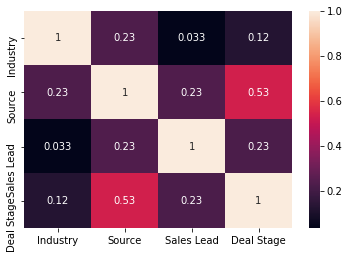

In [15]:
correlation = df.corr()

import seaborn as sn
import matplotlib.pyplot as plt

sn.heatmap(correlation, annot=True)

## Heatmap fix
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()